# Project: Investigate a Dataset of Over 10,000 Movies From The Movie Data Base (TMDb)

## Table of Contents

### Introduction
### Data Wrangling
### Exploratory Data Analysis
### Conclusions


### Introduction

The chosen dataset for this project is one that contains information of about 10,000 movies from The Movie Database (TMDb) including ratings and revenues.

The focus of this project would be to use the available data to as best as possible, establish the correlation between the revenues generated by movies and the effect of budgets, genres, release dates, directors and the production company.

The result of the analysis after properly wrangling the data would be used to answer questions like:
     
    1. Is a movies likely to do well in the markets if it has a huge budget?
    2. Do ratings affect the revenues of movies?
    3. How have the revenues from movies changed over the years?
    
Trends would be displayed on graphs and conclusions drawn based on the results.


In [98]:
# We would be using pandas, numpy, matplotlib and seaborn (if necessary) and would therefore import them here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In this section, we would load our data into the dataframe and perform the process of cleaning the data before exploration can begin.

In [99]:
# We load and view the column titles of the data using the codes below 
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### General Properties
The table above shows the column title and just one row. We would proceed to inspect the table and determine some of its characteristics such as the number of rows and the data types using the "shape" and "dtypes" functions as well as the cells that have null values and rows with duplicates. These would be performed in the code cells below.

In [100]:
# Check for number of rows and columns
df_movies.shape

(10866, 21)

In [101]:
# Check the general characteristics to have an overview of columns with empty cells and the data types in each column
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Deep Dive

The general characteristics of the data has been established and we would need to determine which rows are required for our analysis and then determine what is needed to clean the data before we proceed for exploration. Here, we would be dropping columns not needed, dropping duplicated rows and ensuring all columns are formated with the correct data types.

In [102]:
# Check for the number of duplicated rows
df_movies.duplicated().sum()

1

In [103]:
# Since there was just one duplicated row, we can proceed to drop it and then confirm that the duplicate is deleted
df_movies.drop_duplicates(inplace = True)
df_movies.duplicated().sum()

0

In [104]:
# We would next be dropping the columns we don't need for this analysis
df_movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'vote_count'], axis = 1, inplace = True)
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [105]:
# We confirm the null cells
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [106]:
# Since we may interested in the columns with null values, we would not drop these rows for now but instead, 
#fill them up with "NA" because the contain strings as data types.
# This NA would mean that the cells were not defined in the originally data
df_movies['cast'] = df_movies['cast'].fillna('NA')
df_movies['director'] = df_movies['director'].fillna('NA')
df_movies['genres'] = df_movies['genres'].fillna('NA')
df_movies['production_companies'] = df_movies['production_companies'].fillna('NA')
df_movies.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [107]:
# We would not be needing the runtime for this analysis as well, so we drop it
df_movies.drop(['runtime'], axis = 1, inplace = True)
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [108]:
#We then convert all the datatypes in the various columns accordingly
df_movies.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [109]:
df_movies.describe()

,popularity,budget,revenue,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [110]:
df_movies.query('revenue_adj < 0')

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj


In [111]:
# We want the adjusted budget and revenues as int and the release date as datetime. 
# The conversions are performed with the following codes
#df_movies = df_movies.astype({'revenue' : "int", 'budget' : "int", 'revenue_adj' : "int", 'budget_adj' : "int"})
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

## Exploratory Data Analysis
In this section, we would use the cleaned data to compute some basic statistics and create some visualizations that would enable us answer some of the questions we posed when we set out in the beginning of this project.

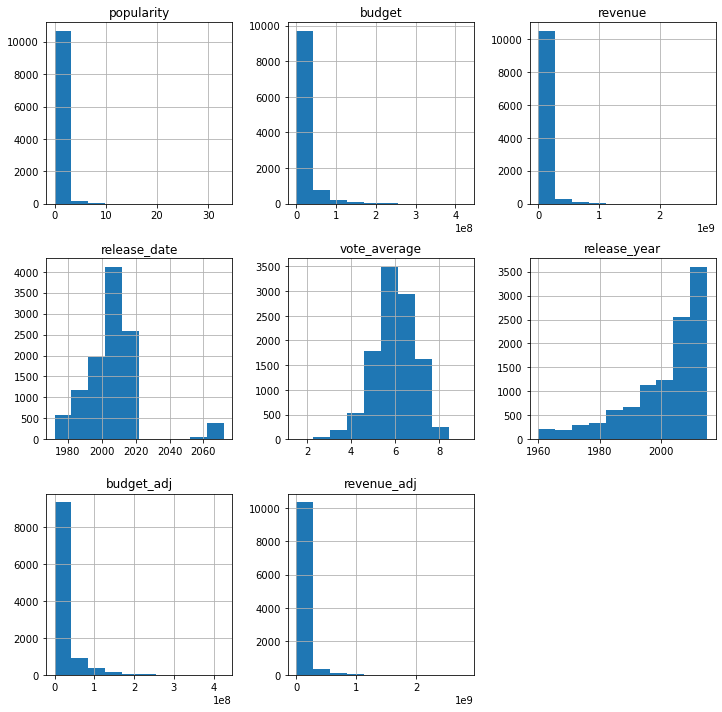

In [112]:
# We generate a general overview of the histograms
df_movies.hist(figsize=(12,12));

In [113]:
# It would be preferable to divide the various budget and revenue columns by 1e6
df_movies['budget'] = df_movies['budget'].apply(lambda x : x / 1e6)
df_movies['revenue'] = df_movies['revenue'].apply(lambda x : x / 1e6)
df_movies['budget_adj'] = df_movies['budget_adj'].apply(lambda x : x / 1e6)
df_movies['revenue_adj'] = df_movies['revenue_adj'].apply(lambda x : x / 1e6)
df_movies.describe()

,popularity,budget,revenue,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,14.624286,39.826896,5.975012,2001.321859,17.549894,51.369002
std,1.000231,30.914285,117.008277,0.935138,12.813260,34.307527,144.638333
min,0.000065,0.000000,0.000000,1.500000,1960.000000,0.000000,0.000000
25%,0.207575,0.000000,0.000000,5.400000,1995.000000,0.000000,0.000000
50%,0.383831,0.000000,0.000000,6.000000,2006.000000,0.000000,0.000000
75%,0.713857,15.000000,24.000000,6.600000,2011.000000,20.853251,33.701729
max,32.985763,425.000000,2781.505847,9.200000,2015.000000,425.000000,2827.123750


### 1. Is a movie likely to do well in the markets if it has a huge budget?

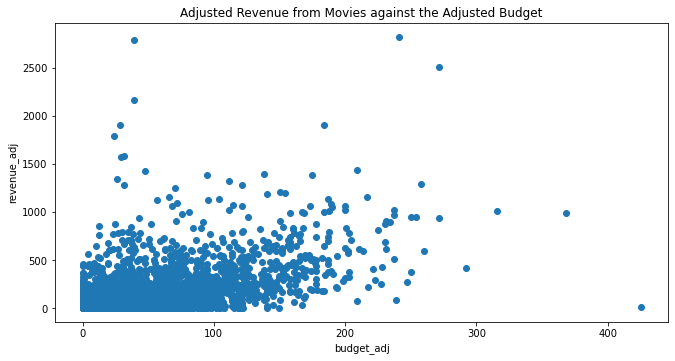

In [114]:
# Here we make a scatter plot of the adjusted budget vs the adjusted revenues
#df_movies.plot(x="budget_adj", y="revenue_adj", kind="scatter");
x = df_movies["budget_adj"]
y = df_movies["revenue_adj"]
plt.rcParams["figure.figsize"] = (11,5.5)
plt.scatter(x, y)
plt.xlabel("budget_adj")
plt.ylabel("revenue_adj")
plt.title('Adjusted Revenue from Movies against the Adjusted Budget');

The scatter plot above seem to suggest movies with better budgets eventually earns better in the market but it is not generally the case

### 2. Do ratings affect the revenues of movies?

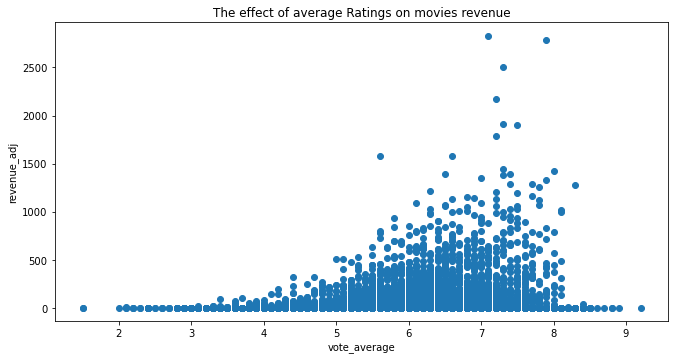

In [115]:
# Here we make another scatter plot of the ratings vs the adjusted revenues
#df_movies.plot(x="vote_average", y="revenue_adj", kind="scatter");
x = df_movies["vote_average"]
y = df_movies["revenue_adj"]
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = (11,5.5)
plt.xlabel("vote_average")
plt.ylabel("revenue_adj")
plt.title('The effect of average Ratings on movies revenue');

The concentration of the plot above seem to suggest that movies with better ratings generally have better revenues

### 3. How have the revenues from movies changed over the years?

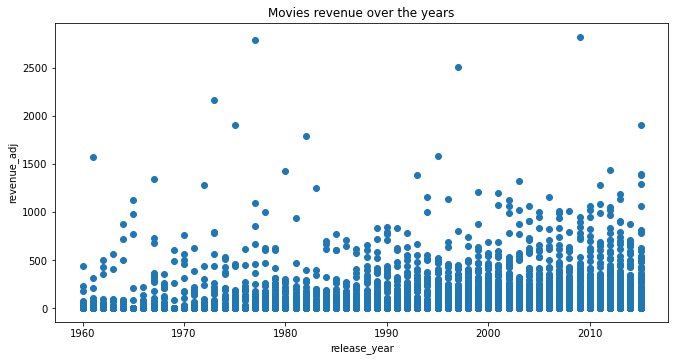

In [116]:
# Lastly, we make another scatter plot of the release year vs the adjusted revenues
#df_movies.plot(x="release_year", y="revenue_adj", kind="scatter");
x = df_movies["release_year"]
y = df_movies["revenue_adj"]
plt.scatter(x, y)
plt.xlabel("release_year")
plt.ylabel("revenue_adj")
plt.title('Movies revenue over the years')
plt.rcParams["figure.figsize"] = (11,5.5);

The graph above strongly suggests that the revenues from movies have enjoyed a steady tremendous growth over the years

### 4. What genres are dominant in the top 20 highest grossing movies? Are there any influences from the movies directors?

In [117]:
# we use the code below to view rows with the 20 highest revenues from movies
df_movies.nlargest(20, columns = ['revenue_adj'])

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237.00,2781.505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,240.886903,2827.123750
1329,12.037933,11.00,775.398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,39.575591,2789.712242
5231,4.355219,200.00,1845.034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,7.3,1997,271.692064,2506.405735
10594,2.010733,8.00,441.306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,7.2,1973,39.289277,2167.324901
9806,2.563191,7.00,470.654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,7.3,1975,28.362748,1907.005842
3,11.173104,200.00,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,183.999919,1902.723130
8889,2.900556,10.50,792.910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,7.2,1982,23.726245,1791.694309
8094,1.136610,22.00,1106.279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,5.6,1995,31.481271,1583.049536
10110,2.631987,4.00,215.880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,6.6,1961,29.179445,1574.814740
4361,7.637767,220.00,1519.557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,7.3,2012,208.943742,1443.191435


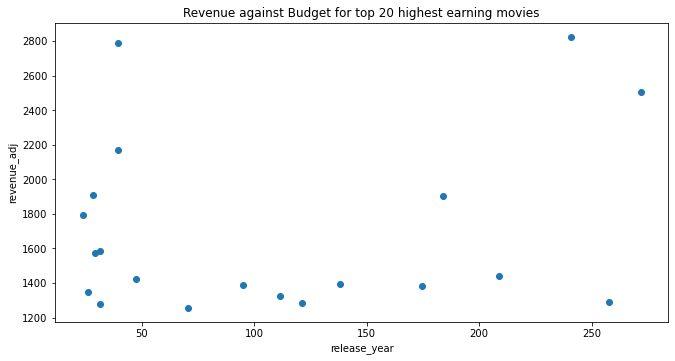

In [118]:
# We try to investigate the pattern between the highest grossing movies and their budgets with the scatter plot below
#df_movies.nlargest(20, columns = ['revenue_adj']).plot(x="budget_adj", y="revenue_adj", kind="scatter");
x = df_movies.nlargest(20, columns = ['revenue_adj'])["budget_adj"]
y = df_movies.nlargest(20, columns = ['revenue_adj'])["revenue_adj"]
plt.rcParams["figure.figsize"] = (11,5.5)
plt.scatter(x, y)
plt.xlabel("release_year")
plt.ylabel("revenue_adj")
plt.title('Revenue against Budget for top 20 highest earning movies');

In [119]:
#Count of the directors with movies in the top 20
df_movies.nlargest(20, columns = ['revenue_adj'])['director'].value_counts()

Steven Spielberg                                     3
James Cameron                                        2
Joss Whedon                                          2
George Lucas                                         1
William Friedkin                                     1
J.J. Abrams                                          1
Irwin Winkler                                        1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1
Irvin Kershner                                       1
Colin Trevorrow                                      1
James Wan                                            1
Wolfgang Reitherman                                  1
Peter Jackson                                        1
David Yates                                          1
Francis Ford Coppola                                 1
Richard Marquand                                     1
Name: director, dtype: int64

In [120]:
#We do the same counts for genres
df_movies.nlargest(20, columns = ['revenue_adj'])['genres'].value_counts()

Adventure|Action|Science Fiction             3
Action|Adventure|Fantasy|Science Fiction     1
Adventure|Family|Fantasy                     1
Action|Adventure|Science Fiction             1
Adventure|Fantasy|Action                     1
Family|Animation|Adventure                   1
Action|Crime|Thriller                        1
Adventure|Science Fiction                    1
Action|Adventure|Science Fiction|Thriller    1
Science Fiction|Action|Adventure             1
Adventure|Animation|Comedy|Family            1
Crime|Drama|Mystery|Thriller|Action          1
Science Fiction|Adventure|Family|Fantasy     1
Action|Adventure|Science Fiction|Fantasy     1
Horror|Thriller|Adventure                    1
Drama|Horror|Thriller                        1
Drama|Romance|Thriller                       1
Drama|Crime                                  1
Name: genres, dtype: int64

In [121]:
#We do the same counts for production companies out of curiousity
df_movies.nlargest(20, columns = ['revenue_adj'])['production_companies'].value_counts()

Lucasfilm|Twentieth Century Fox Film Corporation                                                              3
Universal Pictures|Amblin Entertainment                                                                       2
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    1
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1
Warner Bros.|Heyday Films|Moving Picture Company (MPC)                                                        1
Marvel Studios|Prime Focus|Revolution Sun Studios                                                             1
WingNut Films|New Line Cinema                                                                                 1
Walt Disney Pictures                                                                                          1
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                             

From the investigation above, it can be seen that the most common genres amongst the top 20 highest revenue generating movies are
    Adventure
    Science fiction
    Action
    Fantasy
    Thriller
    
Additionally, we can see that there are three directors with more than one movie (Steven Spielberg with 3, James Cameron with 2 and Joss Whedon also with 2) in the top 20 and this may be an indication that directing may have an influence in how well a movie is received in the market.

Furthermore, the investigation reveals there are certain production companies that have multiple movies in the top 20 but there also seem to be a lot of collaboration between them.

The scatter plot of budget against revenue for these top 20 movies does not show any correlation that is sufficient to draw any conclusions about this relationship.

## Conclusions

This has been an interesting work considering it is my first ever task doing a data analysis project. I have been able to acquire data on over 10,000 movies from The Movies Database (TMDb) and successfully wrangled the data before exploration.

I am able to conclude that there appears to be a strong correlation between the budget and ratings of movies to the revenues they generate in the market. Additionally, I have been able to establish that the revenues from movies have steadily increased over the years which is a direct indication that the movie industry is growing with even more opportunities for future growth.

I have only done an analysis of the possible influence of genre types on the top 20 highest revenue generating movies and discovered that these are mainly action, adventure, science fiction and fantasy movies. I also only considered the influence of directors and production companies on the top 20 highest revenue generating movies and found out that 3 directors were responsible for 7 out of the 20 highest grossing movies. 

I believe there are limitations in this analysis as it did not determine the effects of the cast in the revenues movies generated and this was because the data was presented in a way I dont yet know how to wrangle. There are obviously further investigations that could be performed on this dataset with a significant potential to improve the quality of this analysis when I have acquired more data analysis skills through the learnings in my nanodegree program.

Thank you for taking time to read this work.

### Suleman Aneru.